In [404]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

## F-ce samoadjungovany tvar

In [405]:
def p_i(x):
    return 1./x**2

def q_i(x):
    return 4./x**4

def f_i(x):
    return -6./x**3

## Pocatecni podminky

In [406]:
x_0 = 1.
x_n = 2.

y_0 = 0.
y_n = -1.5

pocet_kroku = 1000
h = (x_n - x_0) / pocet_kroku

## Napleneni matice A

In [407]:
A = np.zeros((pocet_kroku, pocet_kroku), dtype=np.float64)

for i in range(len(A)):
    for j in range(len(A)):
        if i==j:
            x_i = x_0 + i*h
            A[i][i] = p_i(x_i - h / 2.) + p_i(x_i + 3 * h / 2.) + h ** 2 * q_i(x_i + h)
            
            if i>0:
                A[i][i-1] = -p_i(x_i - h / 2.)
                
            if i< len(A)-1:
                A[i][i+1] = -p_i(x_i + 3 * h / 2.)

A    

array([[ 1.99801147, -0.99700674,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.99900075,  1.99402341, -0.99501869, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.99700674,  1.99004727, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.50125298,
        -0.25037542,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.25062617,
         0.50075147, -0.25012505],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.25037542,  0.50025072]])

In [408]:
hl_diag, nad_h_diag, pod_h_diag = map(lambda x: np.zeros(x), [pocet_kroku]*3)

for i in range(pocet_kroku):
    x_i = x_0 + i*h
    
    hl_diag[i] = p_i(x_i - h / 2.) + p_i(x_i + 3 * h / 2.) + h ** 2 * q_i(x_i + h)
    
    if i>0:
        pod_h_diag[i] = -p_i(x_i - h / 2.)
        
    if i < pocet_kroku-1:
        nad_h_diag[i] = -p_i(x_i + 3 * h / 2.)

## Naplneni vektoru g

In [409]:
g = np.zeros(pocet_kroku, dtype=np.float64)

g[0] = h**2 * f_i(x_0 + h) + p_i(x_0 + h/2.) * y_0
g[-1] = h**2 * f_i(x_n - h) + p_i(x_n - h/2.) * y_n

x_2 = x_0 + h *2.
for i in range(1, len(g)-1):
    g[i] = h**2 * f_i(x_2)
    x_2 += h

In [410]:
print(A.shape)
print(g.shape)

(1000, 1000)
(1000,)


In [411]:
def tri(n, hl_d, p, s, g):

    for i in range(1, n):
        r = p[i] / hl_d[i - 1]
        hl_d[i] -= r * s[i - 1]
        g[i] -= r * g[i - 1]

    g[n - 1] /= hl_d[n - 1]
    for i in range(n - 2, -1, -1):
        g[i] = (g[i] - s[i] * g[i + 1]) / hl_d[i]

    return g

## Reseni soustavy tridiagonální matice $Ag = y$

In [412]:
y_numer_res = solve_banded((1, 1), [pod_h_diag, hl_diag, nad_h_diag], g)

## Graf vysledek

In [413]:
def vysledek(x, y_hodnoty, nazev_grafu):
    
    plt.plot(x,y_hodnoty)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(nazev_grafu)

In [414]:
x = [x for x in np.arange(x_0 , x_n, h)]

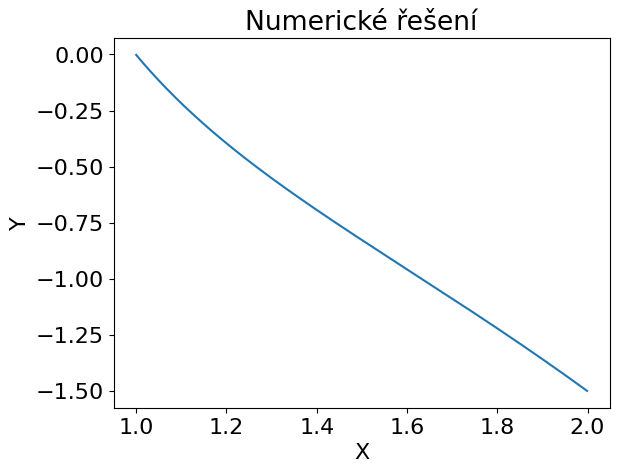

In [415]:
vysledek(x, y_numer_res,"Numerické řešení" )

## Analyticke reseni

In [416]:
y_a_reseni = list(map(lambda x: 1/x - x, x))

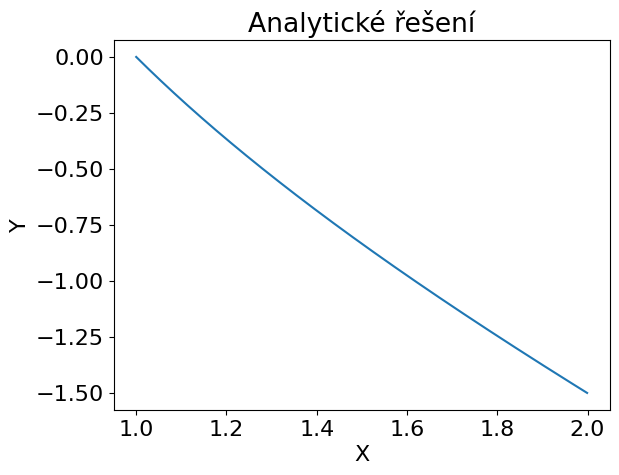

In [417]:
vysledek(x,y_a_reseni, "Analytické řešení")

## GDC

In [418]:
def plot_GDC(num_res, a_res, nazev_grafu):
    
    gdc = np.abs(np.array(num_res) - np.array(a_res))   

    plt.rcParams.update({'font.size': 16})
    plt.plot(gdc)
    plt.title(nazev_grafu)
    plt.xlabel("Iterace")
    plt.ylabel("Chyba")
    

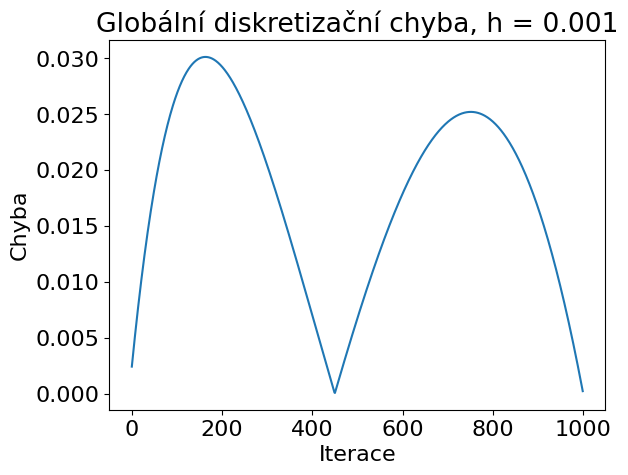

In [419]:
plot_GDC(y_numer_res, y_a_reseni, f"Globální diskretizační chyba, h = {h}")